In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import pathlib

In [3]:
DATA=pathlib.Path.cwd()/'datasets'/'ames_house_prices'

In [4]:
df_train=pd.read_csv(DATA/'train.csv')

In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Get the information about non-null values and types of data in train dataset

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Investigate missing values in 'Ames House Prices' dataset

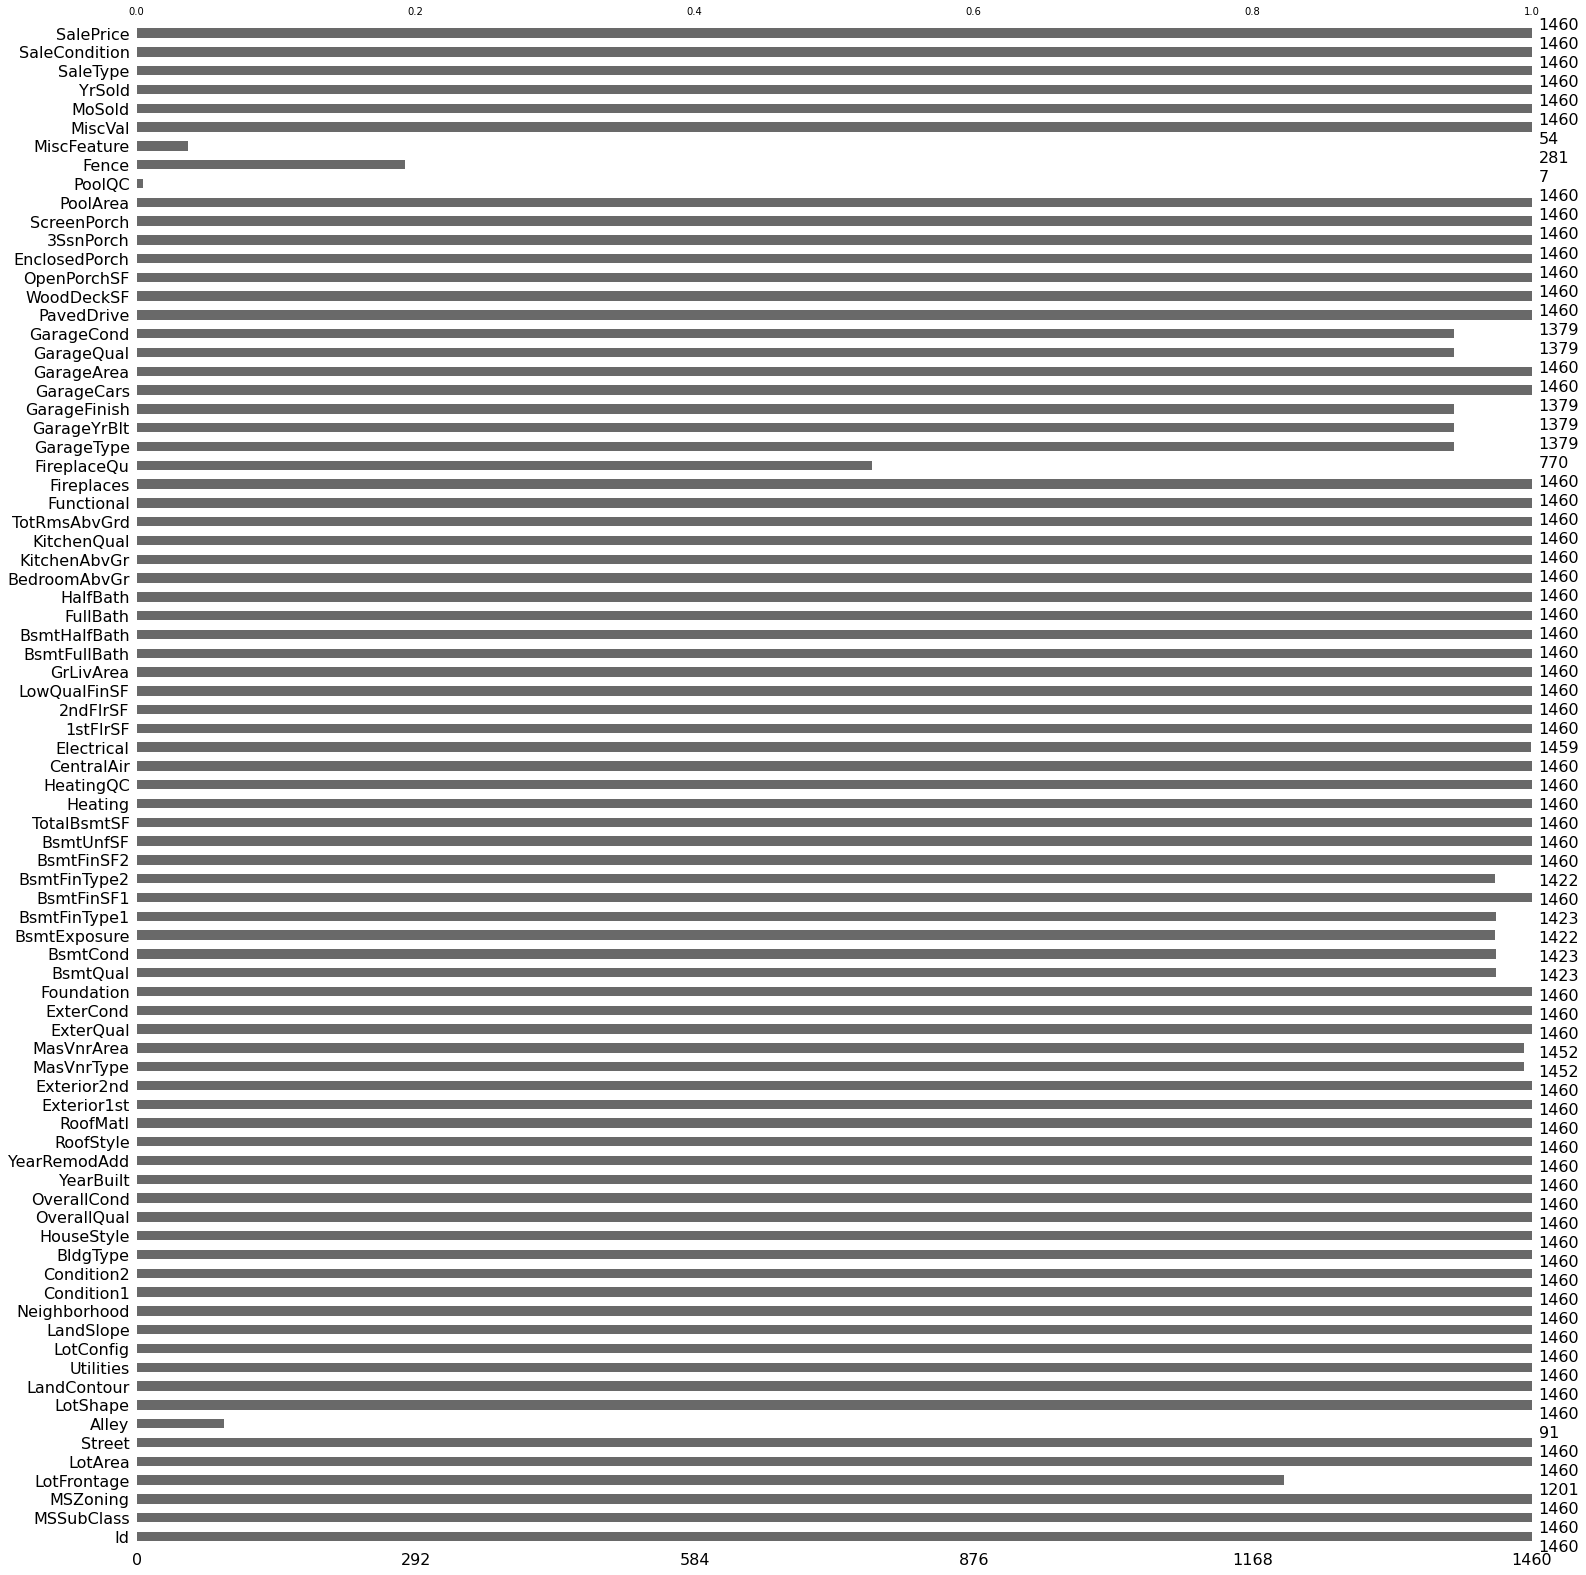

In [7]:
msno.bar(df_train);

Columns 'MiscFeature', 'Fence', 'PoolQC', 'Alley' has the biggest amount of null values

In [8]:
count_na=df_train.isna().sum()

In [9]:
pd.options.display.max_rows=100

In [10]:
count_na

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
na_50_percent=pd.DataFrame(count_na/df_train.shape[0]*100, index=df_train.columns, columns=['na, %'])

In [12]:
na_50_percent[na_50_percent['na, %'] > 50]

na, %
Alley        93.767123
PoolQC       99.520548
Fence        80.753425
MiscFeature  96.301370

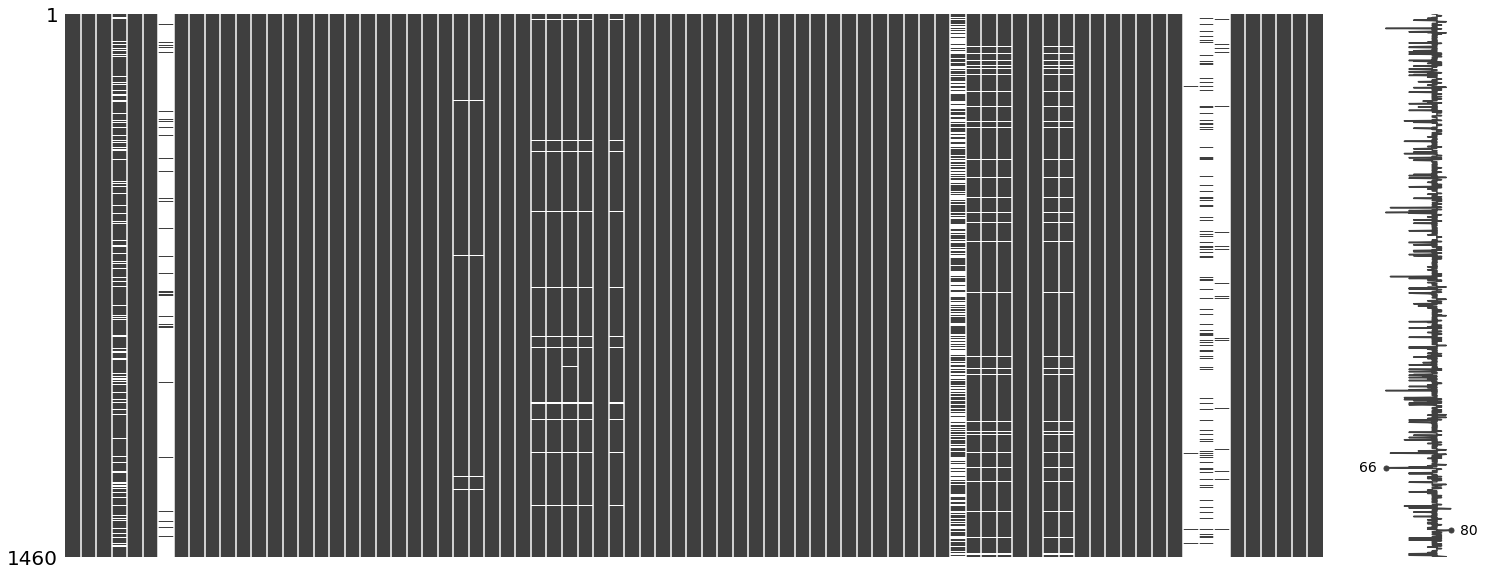

In [13]:
msno.matrix(df_train);

Maximum of filling columns in the row - 80, Maximum of filling columns in the row- 66.

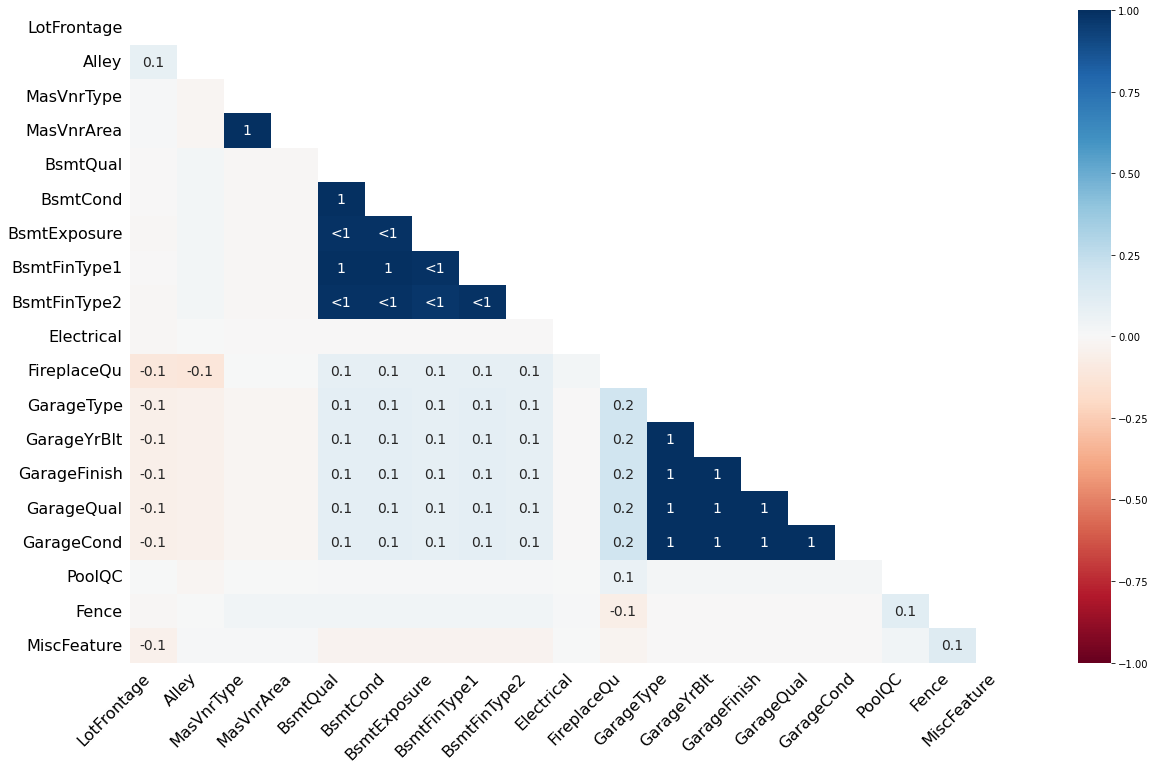

In [14]:
msno.heatmap(df_train);

From coefficients in heatmap we can see that with missing values in 'GarageType' we also have missing values in such columns as GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond as coefficecnt is equal to 1.

Visualizing distribution of target value - `SalePrice` with seaborn.

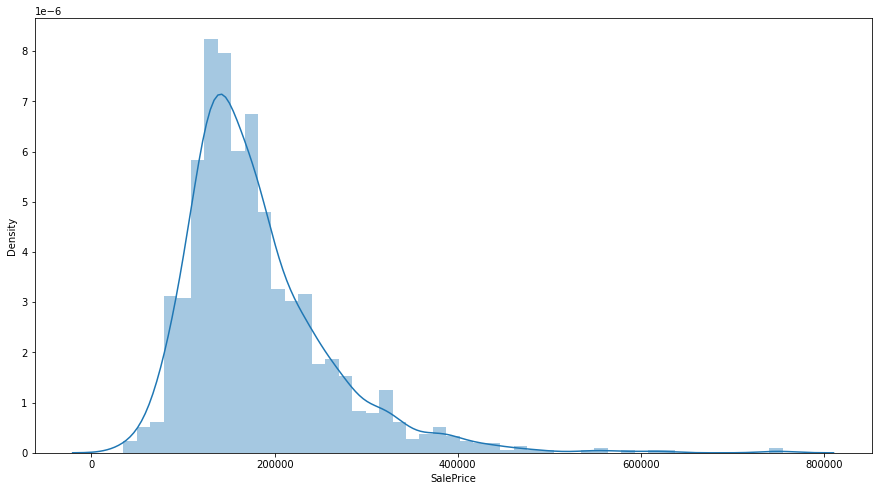

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(df_train["SalePrice"]);

In [16]:
df_train['SalePrice'].skew()

1.8828757597682129

In [17]:
df_train['SalePrice'].kurt()

6.536281860064529

Distribution is a positively skewed and leptokurtic

Create correlation matrix of numerical variables with target values to investigate variables that have the biggest affect on Sale Price

In [18]:
df_train_int_float=df_train.select_dtypes(include=('int64', 'float64'))

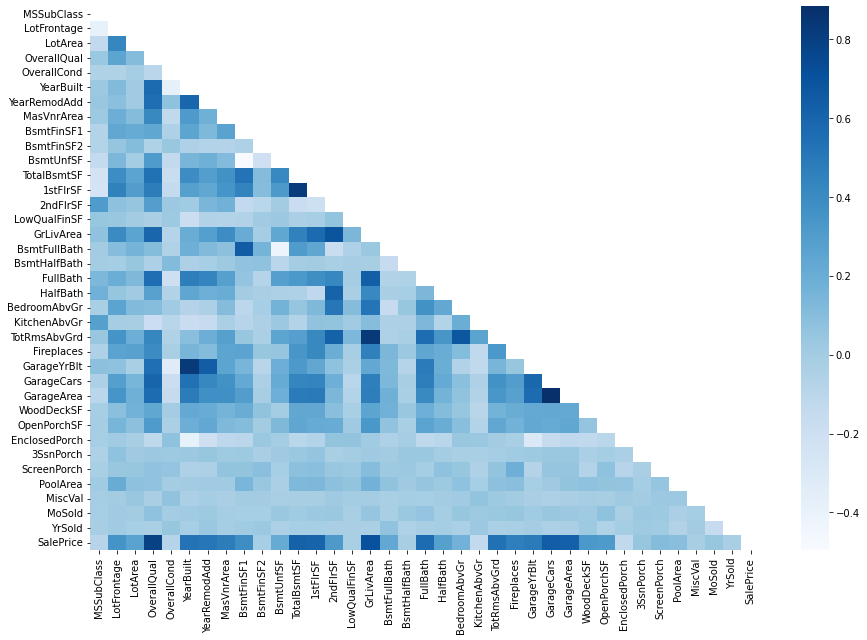

In [19]:
plt.figure(figsize=(15,10))
matrix = np.triu(df_train_int_float.drop('Id', 1).corr())
sns.heatmap(df_train_int_float.drop('Id', 1).corr(), cmap="Blues", mask=matrix);

Top 10 most valuable variables

In [20]:
sale_price_corr=df_train_int_float.corr()['SalePrice']

In [21]:
top10_sale_price_corr=sale_price_corr.drop('SalePrice', 0).nlargest(10)

In [22]:
top10_sale_price_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 correlation matrix

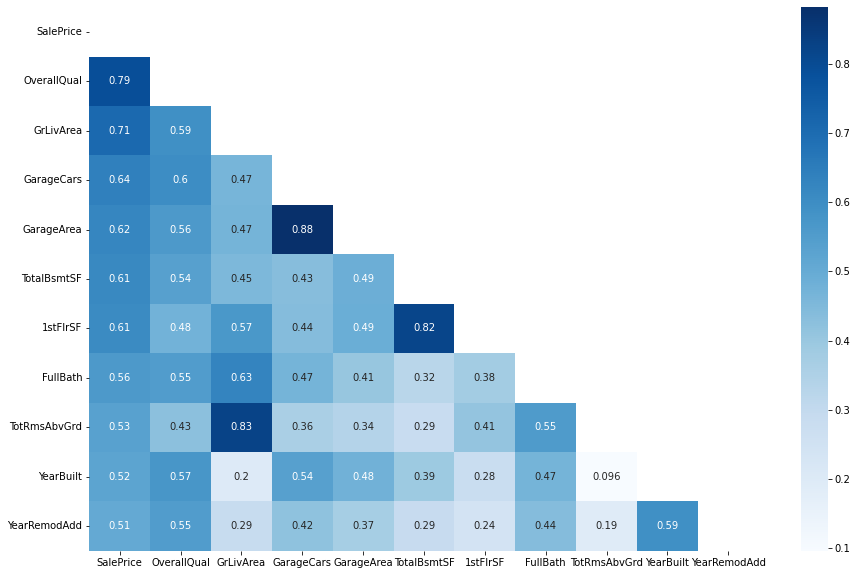

In [23]:
plt.figure(figsize=(15,10))
matrix = np.triu(df_train[sale_price_corr.nlargest(11).index].corr())
sns.heatmap(df_train[sale_price_corr.nlargest(11).index].corr(), cmap="Blues", annot=True, mask=matrix);

From the correlation matrix we can see that the quality of the materials of the house (Overall Qual) highly correlates with the price (this indicator covers at once several more detailed characteristics, also given in the data set relating to the materials of interior and exterior decoration of the house) and the area of the house (GrLivArea), including basement area (TotalBsmtSF). Important pricing factors are the size of the garage (GarageCars) and its area (GarageArea). Year of construction (YearBuilt) and reconstruction data (YearRemoAdd) are also effective indicators. However, in the first 10 positions, which correlate with the price of the house outside such important parameters as the location of the house, district, infrastructure. As well as technical parameters (type of heating, quality of air conditioning in the house, fire safety).


Pairplot for SalePrice and top 10 highly correlated features

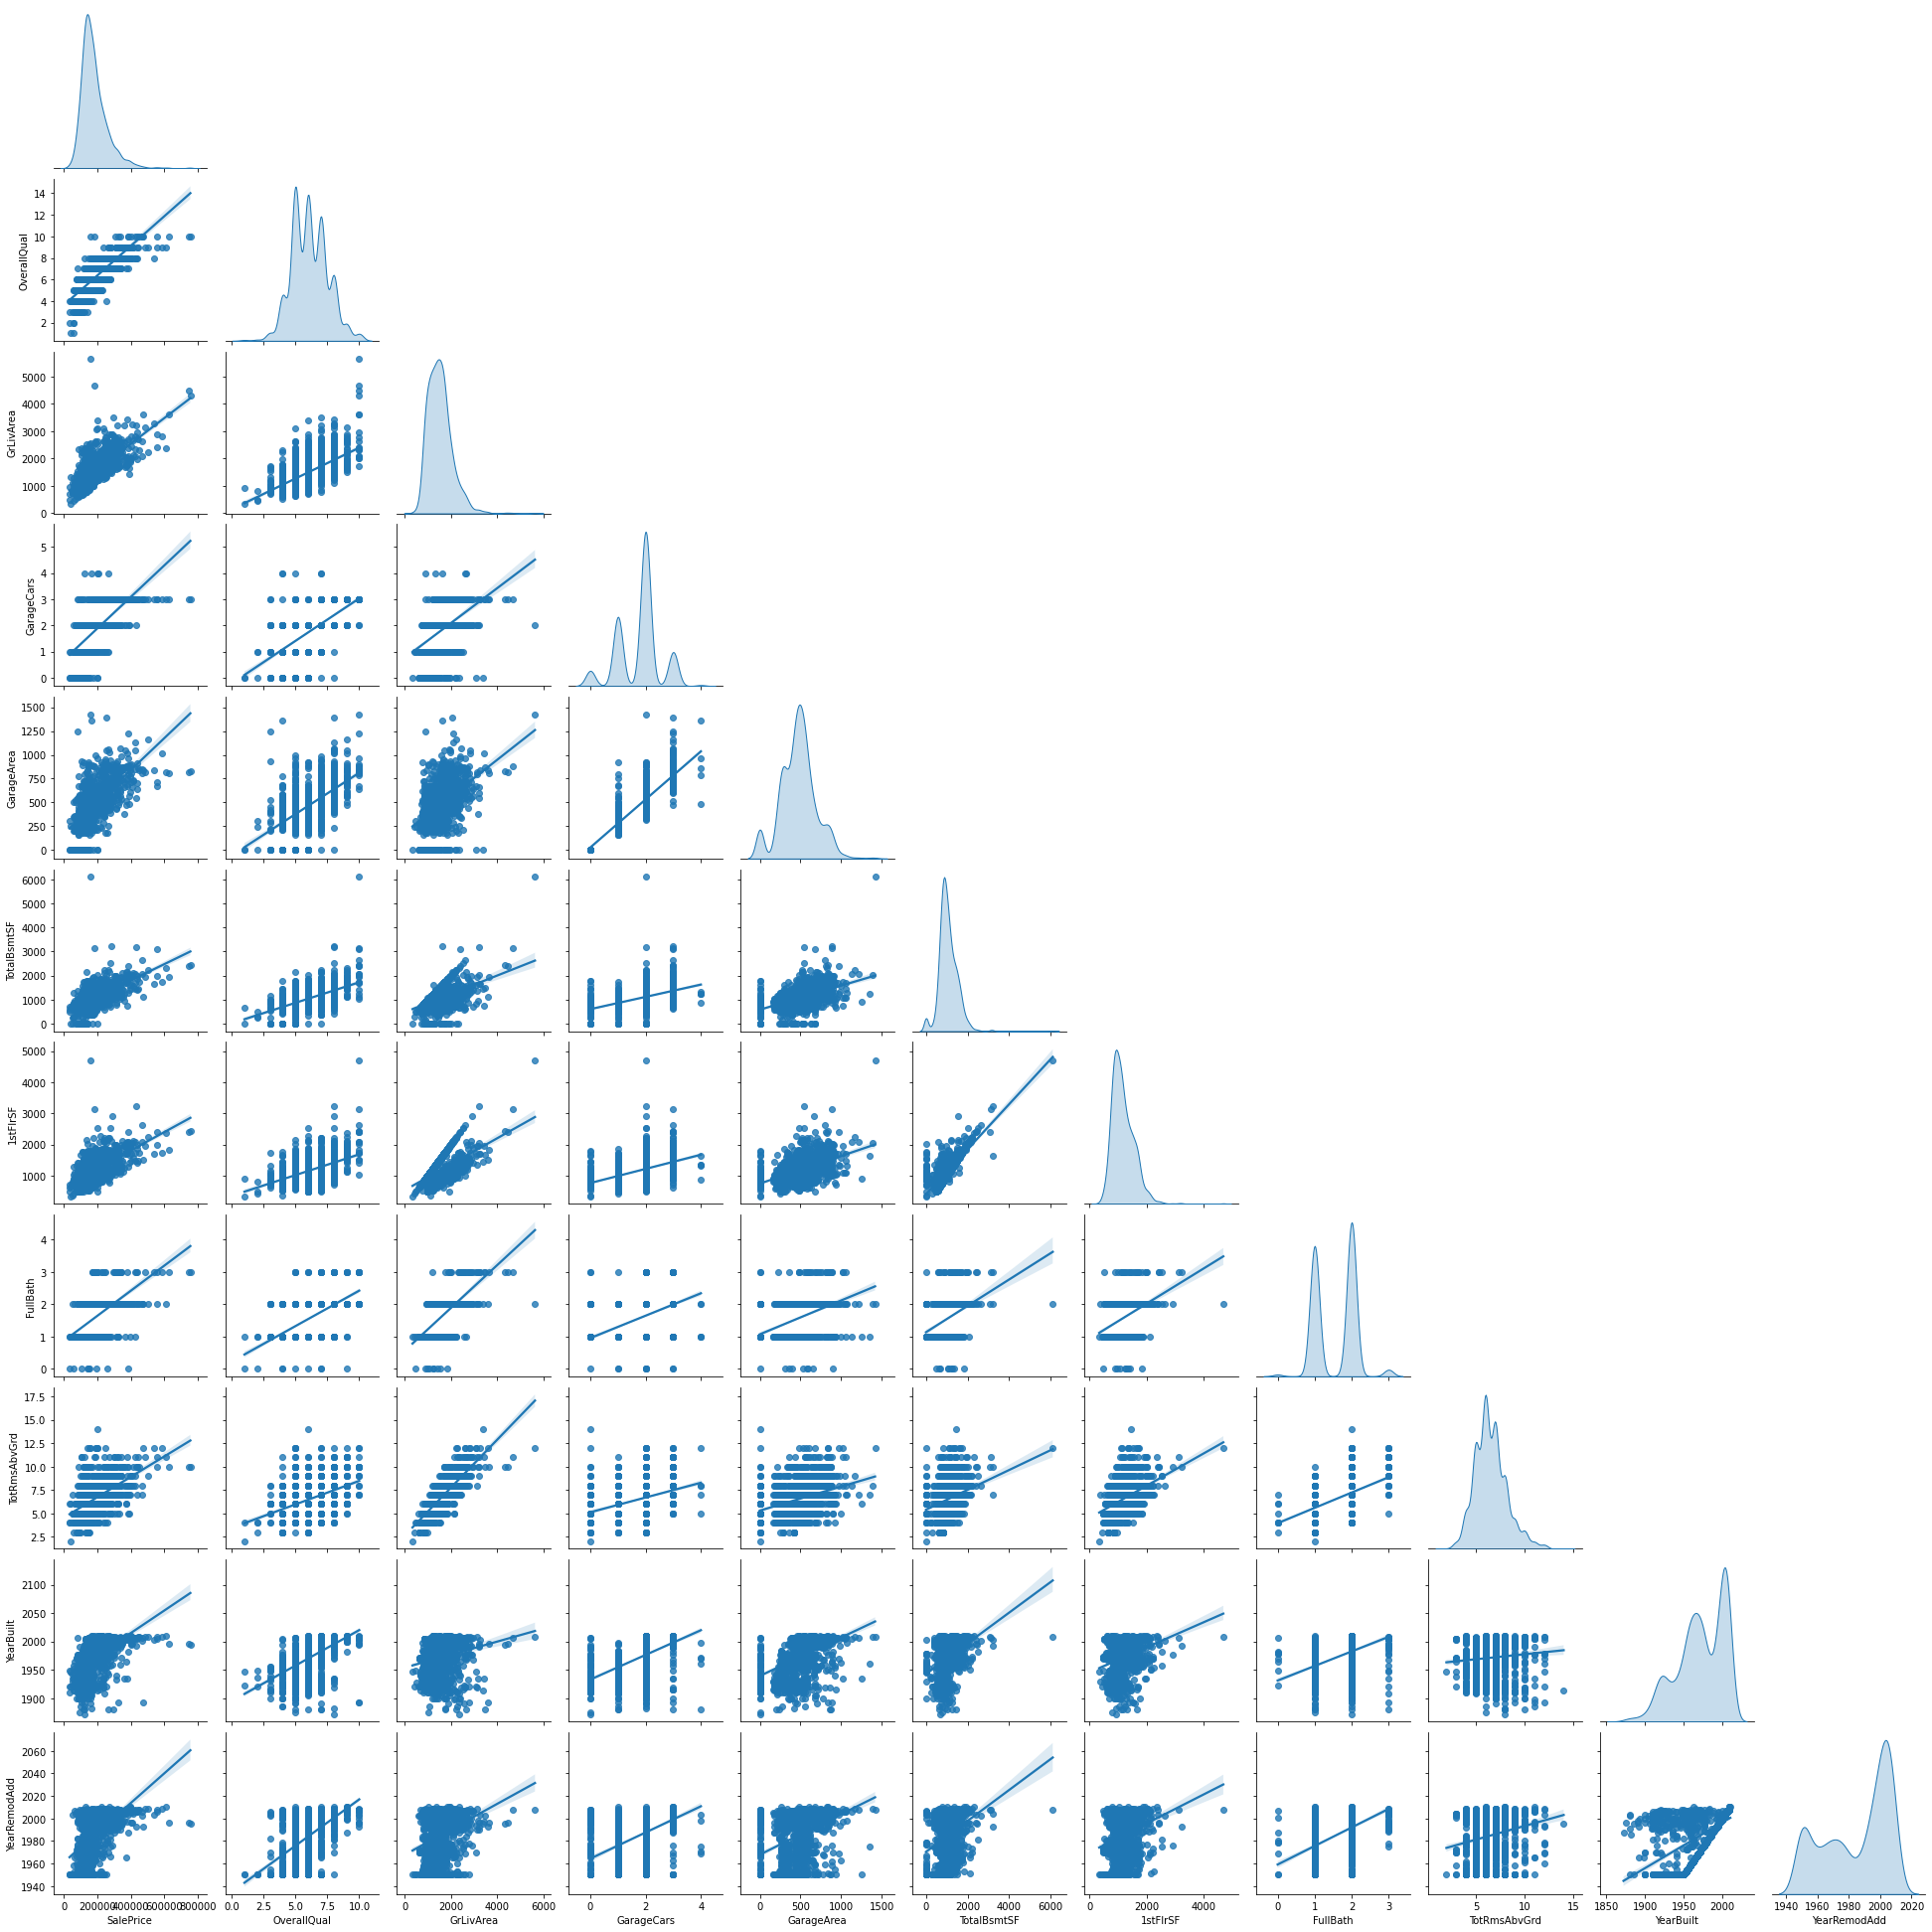

In [24]:
sns.pairplot(df_train[sale_price_corr.nlargest(11).index], kind='reg', diag_kind='kde',corner=True);   

From pairplots we can observe some outliers. For example, points with low SalePrice and high GrLivArea or points with high TotalBsmtSF and low SalePrice. Let's investigate these outliers.

In [25]:
high_GrLivArea=df_train[df_train['GrLivArea']>4000]

In [26]:
pd.options.display.max_columns=100

In [27]:
high_GrLivArea

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
691            Gd          GLQ        1455          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
691             10        Typ           2          Ex     Attchd       1994.0   
1182            10        Typ           2          TA     Attchd       1996.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
691           Fin           3         832         TA         TA          Y   
1182          Fin           3

Displaying only columns with different values in it for better understanding what features might cause difference in prices

In [28]:
important_features=high_GrLivArea[(high_GrLivArea.nunique()[high_GrLivArea.nunique()>1]).index]

In [29]:
important_features.sort_values(by='SalePrice')

Id  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood  \
1298  1299        313.0    63887      IR3         Bnk    Corner      Edwards   
523    524        130.0    40094      IR1         Bnk    Inside      Edwards   
1182  1183        160.0    15623      IR1         Lvl    Corner      NoRidge   
691    692        104.0    21535      IR1         Lvl    Corner      NoRidge   

     Condition1 Condition2  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
1298      Feedr       Norm            5       2008          2008       Hip   
523        PosN       PosN            5       2007          2008       Hip   
1182       Norm       Norm            5       1996          1996       Hip   
691        Norm       Norm            6       1994          1995     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
1298  ClyTile      Stucco      Stucco      Stone       796.0        Ex   
523   CompShg     CemntBd     CmentBd      Stone       762.0        Ex   
1182  CompShg     Wd Sdng     ImStucc       None         0.0        Gd   
691   WdShngl     HdBoard     HdBoard    BrkFace      1170.0        Ex   

     BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1298           Gd        5644        466         6110      4692       950   
523            Gd        2260        878         3138      3138      1538   
1182           Av        2096        300         2396      2411      2065   
691            Gd        1455        989         2444      2444      1872   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  BedroomAbvGr  \
1298       5642             2             0         2             3   
523        4676             1             0         3             3   
1182       4476             1             0         3             4   
691        4316             0             1         3             4   

      TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1298            12           3          Gd     Attchd       2008.0   
523             11           1          Gd    BuiltIn       2007.0   
1182            10           2          TA     Attchd       1996.0   
691             10           2          Ex     Attchd       1994.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  PoolArea PoolQC  \
1298           2        1418         214          292       480     Gd   
523            3         884         208          406         0    NaN   
1182           3         813         171           78       555     Ex   
691            3         832         382           50         0    NaN   

      MoSold  YrSold SaleType SaleCondition  SalePrice  
1298       1    2008      New       Partial     160000  
523       10    2007      New       Partial     184750  
1182       7    2007       WD       Abnorml     745000  
691        1    2007       WD        Normal     755000

 Let's consider 3  theories of possible reasons of difference in prices
1. Neighborhood - 2 houses with low prices are located in the same district, while houses with high prices in another district
2. Sale Condition - 2 houses with low prices have 'partial' Sale condition (houses are not finish)
3. Condition 1/2 - promixity to various conditions (highways, parks) 

Creating scatter plot for values in 'Condition 1' feature

In [30]:
fig = px.strip(df_train, 
               x='GrLivArea', y='SalePrice', color='Condition1', 
               stripmode = 'group',  
               hover_data= ['Id']
)
fig

For house with Id=1299 low price can be explained because of Condition1=FeedR (Adjacent to feeder street), but for house with Id=524 Condition1 = PosN (Near positive off-site feature--park, greenbelt, etc.) unlikely has negative effect on price. Probably, there is other reason of low price.

Creating scatter plot for values in 'Neighborhood' feature

In [31]:
fig = px.strip(df_train, 
               x='GrLivArea', y='SalePrice', color='Neighborhood', 
               stripmode = 'group',  
               hover_data= ['Id']
)
fig

It seems like there is apparent dependence between prices and locations of houses. Let's take a look to descriptive statistics for prices in different locations

In [32]:
df_train.groupby('Neighborhood')['SalePrice'].describe().sort_values(by='mean').style.background_gradient(cmap='Blues')


Houses with Id=524 and  Id=1299 are located in the same district with low prices. Perhaps, that's the reason.